# Building community model with Reframed

In [1]:
from reframed import Community, Environment
from reframed import load_cbmodel, FBA, plot_flux_envelope

In [11]:
CAL2 = load_cbmodel("../GEMs/CAL2.xml", flavor="bigg")
SAL9 = load_cbmodel("../GEMs/SAL9.xml", flavor="bigg")
MAM2 = load_cbmodel("../GEMs/MAM2.xml", flavor="bigg")

Add extra constraints to SAL9 model:

In [17]:
# impose constraints on SAL9 reactions so that the model cannot go crazy with the loop

SAL9.reactions.R_HPPHD.set_flux_bounds(0, float("inf"))
SAL9.reactions.R_DHPPSA.set_flux_bounds(0, float("inf"))
SAL9.reactions.R_DLDH.set_flux_bounds(float("-inf"), 0)
SAL9.reactions.R_HPLSA.set_flux_bounds(0, float("inf"))

In [18]:
community = Community('RA_community', [CAL2, SAL9, MAM2])
merged_community = community.merge_models()

Create the environment using the medium composition from the CAL2 model

In [19]:
medium = Environment.from_model(CAL2).apply(merged_community, exclusive=True, inplace=False)

In [6]:
# "archived" environment

# complete_environment = Environment.empty(community)

# cal_medium = Environment.from_model(CAL2)

# uptake_reactions = [reaction for reaction in cal_medium if cal_medium[reaction][0] < 0]

# for reaction in uptake_reactions:
#     complete_environment.update({reaction: (-10.0, float("inf"))})

## Simulating with FBA

In [20]:
solution = FBA(merged_community, constraints=medium, objective=merged_community.biomass_reaction)

print(solution)
solution.show_values(pattern='BIOMASS', sort=True)

Objective: 0.8749580567217287
Status: Optimal

R_BIOMASS_Ec_iHK1487_core_SAL9  0.874958


### distribution of solution on strains

In [23]:
solution.show_values(pattern='MAM2', sort=True)

R_ACALDtex_MAM2 -167.773
R_ACALDtpp_MAM2 -167.773
R_H2Otex_MAM2 -109.837
R_H2Otpp_MAM2 -109.837
R_ACALD_MAM2 -66.9536
R_PTAr_MAM2  -66.9536
R_PGK_MAM2   -5.94879
R_PGM_MAM2   -5.94879
R_GLUDy_MAM2 -3.43541
R_ASPTA_MAM2 -3.31397
R_ADEt2rpp_MAM2 -3.10359
R_ADEtex_MAM2 -3.10359
R_TRPAS2_MAM2 -3.0667
R_TRPt2rpp_MAM2 -3.0667
R_TRPtex_MAM2 -3.0667
R_ASPtex_MAM2 -3.05517
R_ASPtpp_MAM2 -3.05517
R_PGI_MAM2   -1.80329
R_ARGtex_MAM2 -0.258806
R_ARGORNt7pp_MAM2 -0.258806
R_TYRt2rpp_MAM2 -0.120849
R_TYRtex_MAM2 -0.120849
R_TYRTA_MAM2 -0.120849
R_4ABZGLUH_MAM2 -0.000586222
R_4ABZGLUtr_MAM2 -0.000586222
R_4ABZGLUtex_MAM2 -0.000586222
R_ADCS_MAM2   0.000586222
R_ADCL_MAM2   0.000586222
R_AKGt2rpp_MAM2  0.000586222
R_AKGtex_MAM2  0.000586222
R_ANS_MAM2    0.0497349
R_ANPRT_MAM2  0.0497349
R_IGPS_MAM2   0.0497349
R_TRPS3_MAM2  0.0497349
R_PRPPS_MAM2  0.0497349
R_PRAIi_MAM2  0.0497349
R_GLNS_MAM2   0.0503212
R_CHORM_MAM2  0.120849
R_PPND_MAM2   0.120849
R_SHK3Dr_MAM2  0.17117
R_PSCVT_MAM2  0.17117
R_CHOR

In [24]:
solution.show_values(pattern='SAL9', sort=True)

R_ALCD2x_SAL9 -90.2989
R_ETOHtex_SAL9 -90.2989
R_ETOHtrpp_SAL9 -90.2989
R_ACtex_SAL9 -63.3463
R_ACt2rpp_SAL9 -63.3463
R_ACKr_SAL9  -62.8369
R_Htex_SAL9  -62.2871
R_CO2tpp_SAL9 -26.4203
R_CO2tex_SAL9 -26.4203
R_PGK_SAL9   -11.5615
R_PGM_SAL9   -10.0588
R_GLUtex_SAL9 -6.91304
R_GLUt2rpp_SAL9 -6.91304
R_DHAtpp_SAL9 -6.81127
R_DHAtex_SAL9 -6.81127
R_SUCCtex_SAL9 -6.72538
R_SUCCt1pp_SAL9 -6.72538
R_SUCOAS_SAL9 -6.26556
R_GLUDy_SAL9 -3.88398
R_INDOLEtex_SAL9 -3.01696
R_ASAD_SAL9  -0.935397
R_VALTA_SAL9 -0.879339
R_KARA1_SAL9 -0.765034
R_ADK3_SAL9  -0.691084
R_FUMtex_SAL9 -0.652753
R_FUMt1pp_SAL9 -0.652753
R_HSDy_SAL9  -0.610832
R_RPE_SAL9   -0.534324
R_VPAMTr_SAL9 -0.50909
R_RPI_SAL9   -0.499495
R_IMPC_SAL9  -0.474546
R_IPPMIb_SAL9 -0.394195
R_IPPMIa_SAL9 -0.394195
R_AIRC3_SAL9 -0.391655
R_SDPTA_SAL9 -0.324566
R_ACOAD5f_SAL9 -0.311381
R_ACOAD3f_SAL9 -0.311381
R_ACOAD2f_SAL9 -0.311381
R_ACOAD4f_SAL9 -0.311381
R_DHORTS_SAL9 -0.28943
R_ORPT_SAL9  -0.28943
R_TALA_SAL9  -0.26726
R_TKT1_SAL9  -0.2

In [25]:
solution.show_values(pattern='CAL2', sort=True)

R_ALCD2x_CAL2 -10.5204
R_ETOHtex_CAL2 -10.5204
R_ETOHtrpp_CAL2 -10.5204
R_ASPTA_CAL2 -6.91304
R_AKGt2rpp_CAL2 -6.91304
R_AKGtex_CAL2 -6.91304
R_ASPtex_CAL2 -6.70213
R_ASPtpp_CAL2 -6.70213
R_F6PA_CAL2  -5.17265
R_TALA_CAL2  -4.13812
R_ACKr_CAL2  -3.60731
R_ACtex_CAL2 -3.60731
R_ACt2rpp_CAL2 -3.60731
R_Htex_CAL2  -3.60731
R_PPM_CAL2   -3.10359
R_PUNP1_CAL2 -3.10359
R_ADNt2pp_copy2_CAL2 -3.10359
R_ADNtex_CAL2 -3.10359
R_RPI_CAL2   -2.06906
R_RPE_CAL2   -2.06906
R_TKT2_CAL2  -1.03453
R_TKT1_CAL2  -1.03453
R_ASNt2rpp_CAL2 -0.210913
R_ASNtex_CAL2 -0.210913
R_FUMtex_CAL2  0.187666
R_FUMt1pp_CAL2  0.187666
R_PPA_CAL2    0.210913
R_ADK1_CAL2   0.210913
R_ASNS2_CAL2  0.210913
R_NH4tpp_CAL2  0.210913
R_NH4tex_CAL2  0.210913
R_H2Otex_CAL2  0.480474
R_H2Otpp_CAL2  0.480474
R_PFK_3_CAL2  3.10359
R_FBA3_CAL2   3.10359
R_ADEt2rpp_CAL2  3.10359
R_ADEtex_CAL2  3.10359
R_TPI_CAL2    3.10359
R_O2tpp_CAL2  3.36269
R_O2tex_CAL2  3.36269
R_ACALD_CAL2  3.60731
R_PTAr_CAL2   3.60731
R_DHAtpp_CAL2  5.17265
R_DH

In [26]:
biomass_reactions = merged_community.search_reactions("BIOMASS")
print(biomass_reactions)

['R_BIOMASS_Ec_iML1515_core_75p37M_CAL2', 'R_BIOMASS_Ec_iML1515_WT_75p37M_CAL2', 'R_BIOMASS_Ec_iHK1487_core_SAL9', 'R_BIOMASS_Ec_iML1515_core_75p37M_MAM2', 'R_BIOMASS_Ec_iML1515_WT_75p37M_MAM2']


<AxesSubplot: xlabel='Community growth rate', ylabel='E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate'>

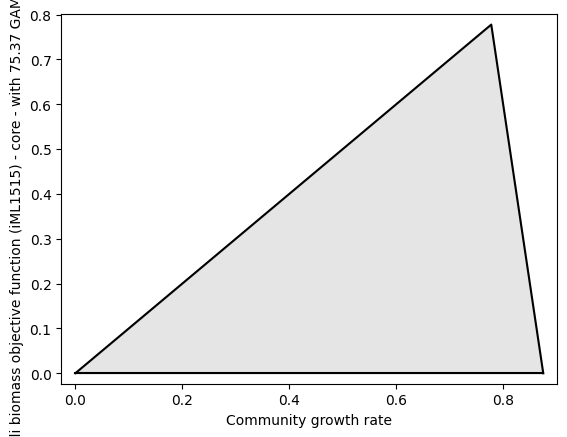

In [27]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_BIOMASS_Ec_iML1515_core_75p37M_CAL2', constraints=medium)

<AxesSubplot: xlabel='Community growth rate'>

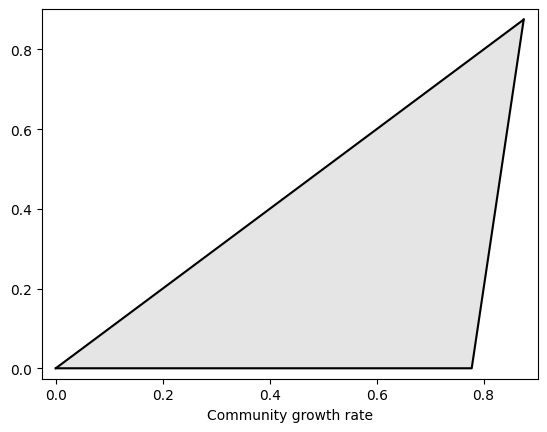

In [28]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_BIOMASS_Ec_iHK1487_core_SAL9', constraints=medium)

<AxesSubplot: xlabel='Community growth rate', ylabel='E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate'>

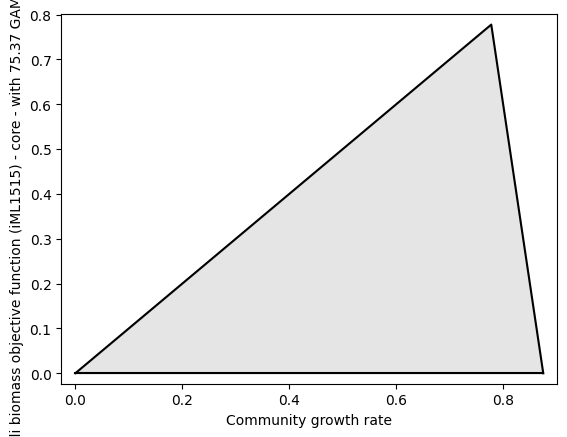

In [29]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_BIOMASS_Ec_iML1515_core_75p37M_MAM2', constraints=medium)

- the FBA solution heavily favours SAL9
    - this is because the BL21 model biomass reaction has a lower ATP requirement + lower ATP maintanace requirement

### Production envelope for rosmarinic acid

<AxesSubplot: xlabel='Community growth rate', ylabel='R_EX_rosma_e'>

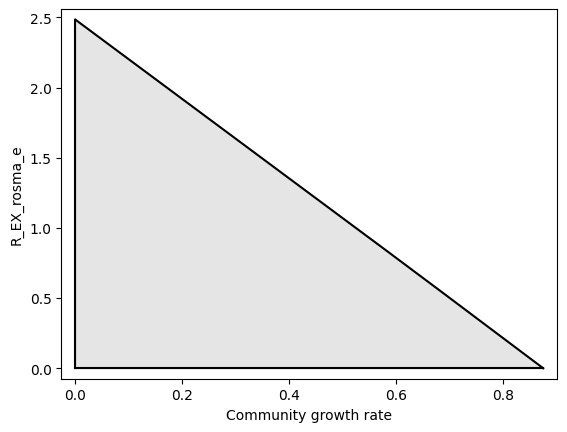

In [30]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_EX_rosma_e', constraints=medium)

- the envelope shows that there will be no RA production when optimising for community biomass since there is no growth-coupling

# Community simulation with SteadyCom

In [31]:
from reframed import SteadyCom

In [32]:
steadycom_solution = SteadyCom(community, constraints=medium)
print(steadycom_solution)

Community growth: 0.9287109375000001
CAL2	0.0038655698611843713
SAL9	0.9952350072889117
MAM2	0.0008994228499039068


- again, there little growth for the other strains than SAL9 in the optimal solution -> look into the solution space using FVA

In [33]:
steadycom_solution.cross_feeding(as_df=True).dropna().sort_values("rate", ascending = False)

,donor,receiver,compound,rate
80,CAL2,SAL9,M_fruur_e,3.865570
113,SAL9,CAL2,M_glcur_e,3.865570
57,SAL9,CAL2,M_glyc_e,3.865570
122,SAL9,CAL2,M_acald_e,3.865570
59,CAL2,SAL9,M_glyald_e,3.865570
...,...,...,...,...
74,SAL9,MAM2,M_his__L_e,0.000079
82,MAM2,CAL2,M_kdo2lipid4_e,0.000070
34,CAL2,MAM2,M_ala__D_e,0.000050
128,CAL2,MAM2,M_uri_e,0.000022


solution without Phe in the medium:

In [35]:
medium_no_phe = medium.copy()
medium_no_phe["R_EX_phe__L_e"] = (0, float("inf"))
solution_no_phe = SteadyCom(community, constraints=medium_no_phe)
print(solution_no_phe)

Community growth: 0.900390625
CAL2	0.005090423666559445
SAL9	0.9925872749527435
MAM2	0.002322301380697035


In [36]:
solution_no_phe.cross_feeding(as_df=True).dropna().sort_values("rate", ascending = False)

,donor,receiver,compound,rate
122,SAL9,CAL2,M_mal__L_e,5.090424
5,CAL2,SAL9,M_idon__L_e,5.090424
129,SAL9,CAL2,M_acald_e,5.090424
118,CAL2,SAL9,M_asp__L_e,5.079430
33,SAL9,CAL2,M_dha_e,3.623643
...,...,...,...,...
92,MAM2,CAL2,M_kdo2lipid4_e,0.000089
36,CAL2,MAM2,M_ala__D_e,0.000064
104,CAL2,SAL9,M_succ_e,0.000013
44,CAL2,MAM2,M_4abzglu_e,0.000001


- likely there are now artificially many cross-feedings

## Community FVA with SteadyCom

In [37]:
from reframed import SteadyComVA
com_fva_solution = SteadyComVA(community, constraints=medium, obj_frac=0.99)
print(com_fva_solution)

{'CAL2': [0.0, 0.38070107277933785], 'SAL9': [0.6192989272187077, 1.0], 'MAM2': [0.0, 0.3807010727830189]}


In [38]:
from reframed import SteadyComVA
from tqdm.notebook import tqdm
import pandas as pd

results_list = []

for i in tqdm(range(950, 1005, 5)):
    frac = i/1000
    com_fva_solution = SteadyComVA(community, constraints=medium, obj_frac=frac)
    com_fva_solution["frac"] = frac
    results_list.append(com_fva_solution)

results_df = pd.DataFrame(results_list)
results_df.set_index("frac")

  0%|          | 0/11 [00:00<?, ?it/s]

,CAL2,SAL9,MAM2
frac,,,
0.950,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.955,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.960,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.965,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.970,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.975,"[0.0, 0.9308913859489412]","[0.06910861405540913, 1.0]","[0.0, 0.9308913859429495]"
0.980,"[0.0, 0.7461117666457643]","[0.25388823335333655, 1.0]","[0.0, 0.746111766650067]"
0.985,"[0.0, 0.5627201894858447]","[0.43727981051023335, 1.0]","[0.0, 0.5627201894909319]"
0.990,"[0.0, 0.38070107277933785]","[0.6192989272187077, 1.0]","[0.0, 0.3807010727830189]"


Text(0.5, 0, 'fraction of optimal solution')

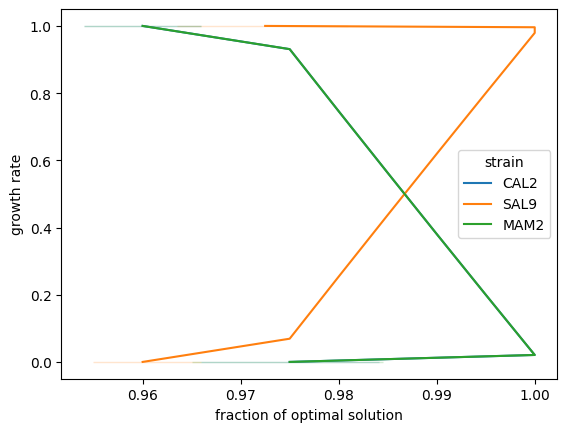

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = results_df.explode(["CAL2", "SAL9", "MAM2"])
df_melt = plot_df.melt('frac', var_name='strain', value_name='growth rate')

sns.lineplot(data=df_melt, x="frac", y="growth rate", hue="strain",orient="y")
plt.xlabel("fraction of optimal solution")

In [40]:
import plotly.express as px

px.scatter(data_frame=df_melt, x="frac", y="growth rate", color="strain")

- note: identical curves for CAL2 and MAM2 (K12 derived strains)

In the experiment it was SAL9 which was the least abundant, and CAL2 and MAM2 have different end-points (but similar trajectories):

         time  subpopulation_percentage strain
13  47.936726                 50.987433   CAL2
27  47.936726                 33.303411   MAM2
41  47.936726                 16.247756   SAL9


<AxesSubplot: xlabel='time', ylabel='subpopulation_percentage'>

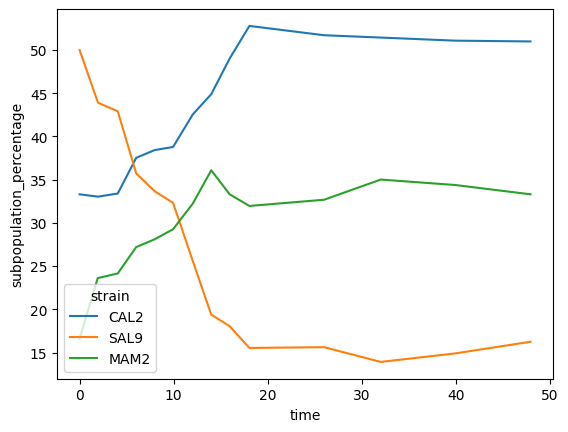

In [35]:
relative_percentage = pd.read_csv("exp_data/subpopulation_percentage/data.csv")

end_time = relative_percentage.time.max().round(0)
print(relative_percentage[relative_percentage["time"].round(0) == end_time])

sns.lineplot(relative_percentage, x="time", y="subpopulation_percentage", hue="strain", hue_order=["CAL2", "SAL9", "MAM2"])

at fraction of optimum around 0.975 percent - there is possibility for high growth-rate of MAM2 and CAL9, and low growth-rate of SAL9

# SteadyCom simulation with RA production as objective

In [41]:
solution = FBA(merged_community, constraints=medium, objective="R_EX_rosma_e")

print(solution)
solution.show_values(sort=True)

Objective: 2.4846238938053085
Status: Optimal

R_H2Otex_CAL2 -51.495
R_H2Otpp_CAL2 -51.495
R_ACALDtex_CAL2 -40.1609
R_ACALDtpp_CAL2 -40.1609
R_ALCD2x_MAM2 -24.0125
R_ETOHtex_MAM2 -24.0125
R_ETOHtrpp_MAM2 -24.0125
R_ACALD_CAL2 -18.6167
R_PTAr_CAL2  -18.6167
R_ACKr_MAM2  -13.4836
R_ACtex_MAM2 -13.4836
R_ACt2rpp_MAM2 -13.4836
R_PGK_CAL2   -12.5707
R_PGM_CAL2   -12.5707
R_DHAtpp_CAL2 -12.5666
R_DHAtex_CAL2 -12.5666
R_F6PA_MAM2  -12.5666
R_Htex_MAM2  -10.999
R_EX_o2_e    -10.3075
R_EX_glc__D_e -10
R_ADEt2rpp_CAL2 -7.53998
R_ADEtex_CAL2 -7.53998
R_PPM_MAM2   -7.53998
R_PUNP1_MAM2 -7.53998
R_ADNt2pp_copy2_MAM2 -7.53998
R_ADNtex_MAM2 -7.53998
R_CO2tpp_CAL2 -7.38007
R_CO2tex_CAL2 -7.38007
R_CO2tpp_MAM2 -5.26447
R_CO2tex_MAM2 -5.26447
R_ACKr_SAL9  -5.1331
R_ACtex_SAL9 -5.1331
R_ACt2rpp_SAL9 -5.1331
R_AKGt2rpp_CAL2 -5.11686
R_AKGtex_CAL2 -5.11686
R_GLUtex_SAL9 -5.11686
R_GLUt2rpp_SAL9 -5.11686
R_RPE_MAM2   -5.02665
R_RPI_MAM2   -5.02665
R_TYRTA_CAL2 -4.96925
R_SUCOAS_MAM2 -2.63223
R_TRPAS2_CAL2 -

In [42]:
reactions = ["R_HPPHD_SAL9", "R_DHPPSA_SAL9", "R_DLDH_SAL9", "R_HPLSA_SAL9"]

for reaction in reactions:
    print(reaction, solution.values[reaction])

R_HPPHD_SAL9 2.4846238938053093
R_DHPPSA_SAL9 2.4846238938053093
R_DLDH_SAL9 0.0
R_HPLSA_SAL9 0.0


In [44]:
import updated_steadycom

ra_steadycom_solution = updated_steadycom.SteadyCom(community, constraints=medium, objective="R_EX_rosma_e")
print(ra_steadycom_solution)

Community growth: 0.9287109375
CAL2	0.002935758701021291
SAL9	0.9953710732514114
MAM2	0.0016931680475672241


In [45]:
cross_feeding = ra_steadycom_solution.cross_feeding(as_df=True).dropna().sort_values("rate", ascending = False)

In [46]:
cross_feeding[(cross_feeding["compound"] == "M_saa_e") | (cross_feeding["compound"] == "M_34dhcinm_e")]

,donor,receiver,compound,rate
127,CAL2,MAM2,M_34dhcinm_e,0.001198
128,SAL9,MAM2,M_saa_e,0.001198


In [47]:
reactions = ["R_HPPHD_SAL9", "R_DHPPSA_SAL9", "R_DLDH_SAL9", "R_HPLSA_SAL9"]

for reaction in reactions:
    print(reaction, ra_steadycom_solution.values[reaction])

R_HPPHD_SAL9 0.0
R_DHPPSA_SAL9 0.0
R_DLDH_SAL9 -0.0011980936291818012
R_HPLSA_SAL9 0.0011980936291818012


In [48]:
from GEM_eval import saa_loop

saa_loop(ra_steadycom_solution)

False

In [49]:
ra_steadycom_fva_solution = updated_steadycom.SteadyComVA(community, constraints=medium, obj_frac=1.0, objective="R_EX_rosma_e")
print(ra_steadycom_fva_solution)

{'CAL2': [0.0, 0.020719051417318224], 'SAL9': [0.9792809485790119, 0.9960403755383807], 'MAM2': [0.0, 0.020719051422240398]}


In [50]:
import updated_steadycom
from tqdm.notebook import tqdm
import pandas as pd

results_list = []

for i in tqdm(range(950, 1005, 5)):
    frac = i/1000
    ra_com_fva_solution = updated_steadycom.SteadyComVA(community, constraints=medium, obj_frac=frac, objective="R_EX_rosma_e")
    ra_com_fva_solution["frac"] = frac
    results_list.append(ra_com_fva_solution)

results_df = pd.DataFrame(results_list)
results_df.set_index("frac")

  0%|          | 0/11 [00:00<?, ?it/s]

,CAL2,SAL9,MAM2
frac,,,
0.950,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.955,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.960,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.965,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.970,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.975,"[0.0, 0.9308913859326634]","[0.0691086140569439, 1.0]","[0.0, 0.9308913859412442]"
0.980,"[0.0, 0.7461117666468993]","[0.25388823335570976, 1.0]","[0.0, 0.7461117666511754]"
0.985,"[0.0, 0.5627201894861522]","[0.43727981050946596, 1.0]","[0.0, 0.5627201894868392]"
0.990,"[0.0, 0.38070107277932397]","[0.6192989272207043, 1.0]","[0.0, 0.38070107278281284]"


Text(0.5, 0, 'fraction of optimal solution')

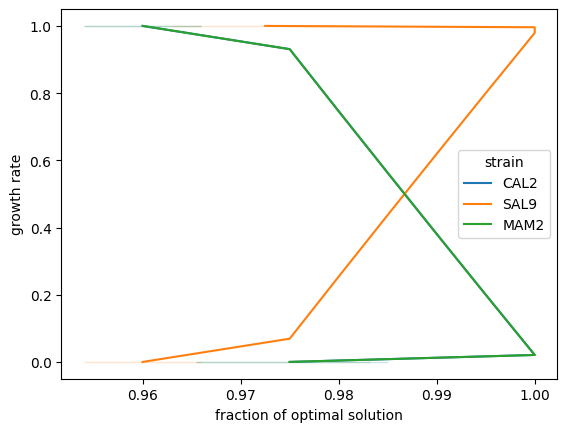

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = results_df.explode(["CAL2", "SAL9", "MAM2"])
df_melt = plot_df.melt('frac', var_name='strain', value_name='growth rate')

sns.lineplot(data=df_melt, x="frac", y="growth rate", hue="strain",orient="y")
plt.xlabel("fraction of optimal solution")

# Phenotype phase-plane plots, using cobrapy

In [45]:
from cobra.io import read_sbml_model

cobrapy_ra_com = read_sbml_model('../GEMs/merged_ra_com.xml')

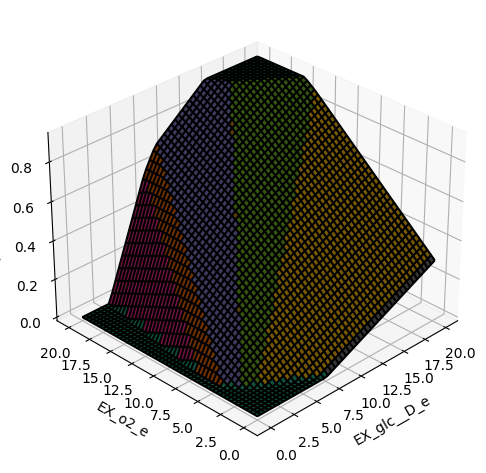

In [46]:
from phpp import PhPP
import numpy as np
import sys
import warnings

#in order to ignore UserWarning: Solver status is 'infeasible' for non-solutions 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#evenly distributed values between 0 and -20 with 50 datapoints
flux_range = np.linspace(0.0, -20, num=50)

phasePlane = PhPP(cobrapy_ra_com, "EX_glc__D_e", "EX_o2_e", flux_range, flux_range)

#plot the phenotype phase plane for oxygen and glucose
phasePlane.plot_PhPP()